In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

I chose to use a dataset about wine quality to compare the models K Nearest Neighbors (KNN) and Ordinary Least Squares regression (OLS) and see which model would be able to predict the quality of wine more accurately. 

In [13]:
data=pd.read_csv('winequality_red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


First I ran the seaborn heatmap so I could see which features were more highly correlated to each other and which ones just created noise.  

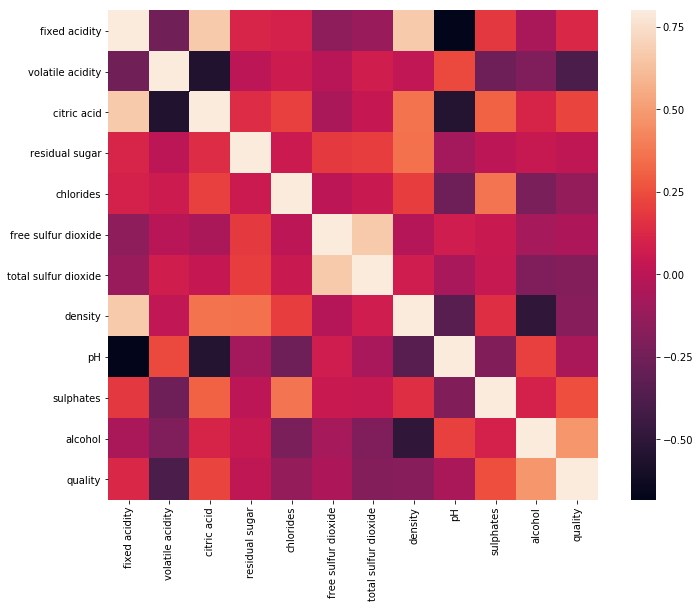

In [6]:
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(corrmat,vmax=.8, square=True)
plt.show()

As you can see with the heatmap that for correlation with quality alcohol percentage and citric acid were the closest, followed by sulphates and fixed acidity. To proceed I chose to use alcohol and citric acid to help predict the quality. 

Next I will use KNN to help predict the wine quality simply by using the two highly correlated features and then picking the values I want to use for each and see what the output prediction will be. 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=4)
X = data[['alcohol', 'citric acid']]
y = data.quality
neighbors.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [8]:
#With an alcohol percentage of 9 and citric acid at 0.4, the model was able to predict that it was a 6 out of a 1 to 10 
#range. 
neighbors.predict([[9,0.4 ]])

array([6])

Now building the OLS model, I will use the same features as I did for KNN, but instead of outputting a simple number for classification it will be a regression giving us many different ways to determine how close our prediction is to being correct. 

In [10]:
import statsmodels.api as sm

reg1 = sm.OLS(endog=data['quality'], exog=data[['alcohol', 'citric acid']], missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [11]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 4.912e+04
Date:                Tue, 30 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:31:33   Log-Likelihood:                -1743.9
No. Observations:                1599   AIC:                             3492.
Df Residuals:                    1597   BIC:                             3503.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
alcohol         0.5191      0.003    175.168      

These results are stating that our prediction, or R-squared is 98.4% correct, which is a great score. Also looking at our F-statistics, the score is very low basically 0 which is a good indicator that our data is well correlated. 

Let's try changing the features and seeing if our prediction changes and how the OLS views the correlation of the features. This time we will use fixed acidity and residual sugar. 

In [ ]:
reg1 = sm.OLS(endog=data['quality'], exog=data[['fixed acidity', 'residual sugar']], missing='drop')
type(reg1)

In [ ]:
results = reg1.fit()
type(results)
print(results.summary())

After running these models I was curious to see if quality would be considered improved the higher the alcohol level. As you can see in the scatter plot below the highest valued wines seem to ranges somewhere in the middle of alcohol levels, demonstrating that citric acid also plays an important role in wine quality. 

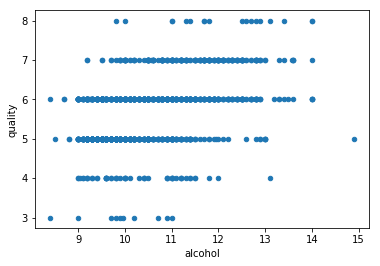

In [9]:
data.plot(x='alcohol', y='quality', kind='scatter')
plt.show()

For me I like the KNN better, I think almost just for simplicity sake. You get the answer right away and it is an easy to read result. However, the OLS has some great inside data on the dataset if you are looking for deeper explanations into the correlation between the features. Also by changing up the features you can see then the importance in relation to quality based on the features you choose by using the std, R-squared, and F-statistic. This wine data set was a good one to use for both because you can make it a classification based on the quality or build it into a regression. 